In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('data.csv')
print("shape", df_raw.shape)
df_raw.info()

shape (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se      

In [3]:
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_raw.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

An extra column seems to have been created


In [5]:
df = df_raw.drop(['id','Unnamed: 32'], axis = 1) #dropping ID cause it doesn't carry any useful information

In [6]:
df.shape

(569, 31)

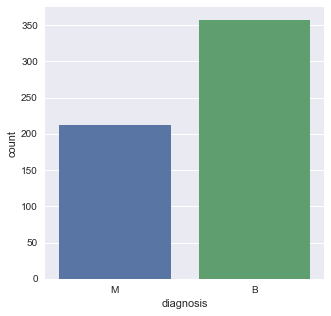

In [7]:
plt.figure(figsize= (5,5))
sns.countplot(df['diagnosis'])
plt.show()

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


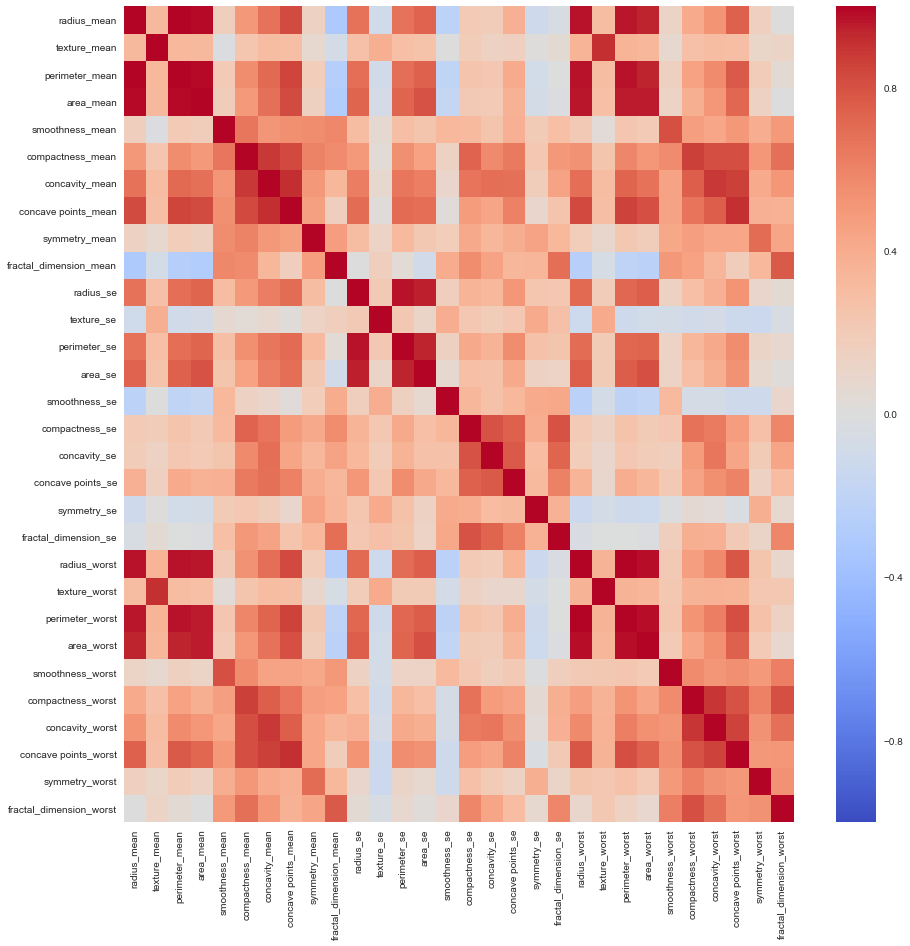

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')
plt.show()

Too crowded, lets focus on the mean values to get an understanding of the main features

In [10]:
#columns 1 to 11 are 'mean' 
means = list(df.columns[1:11])

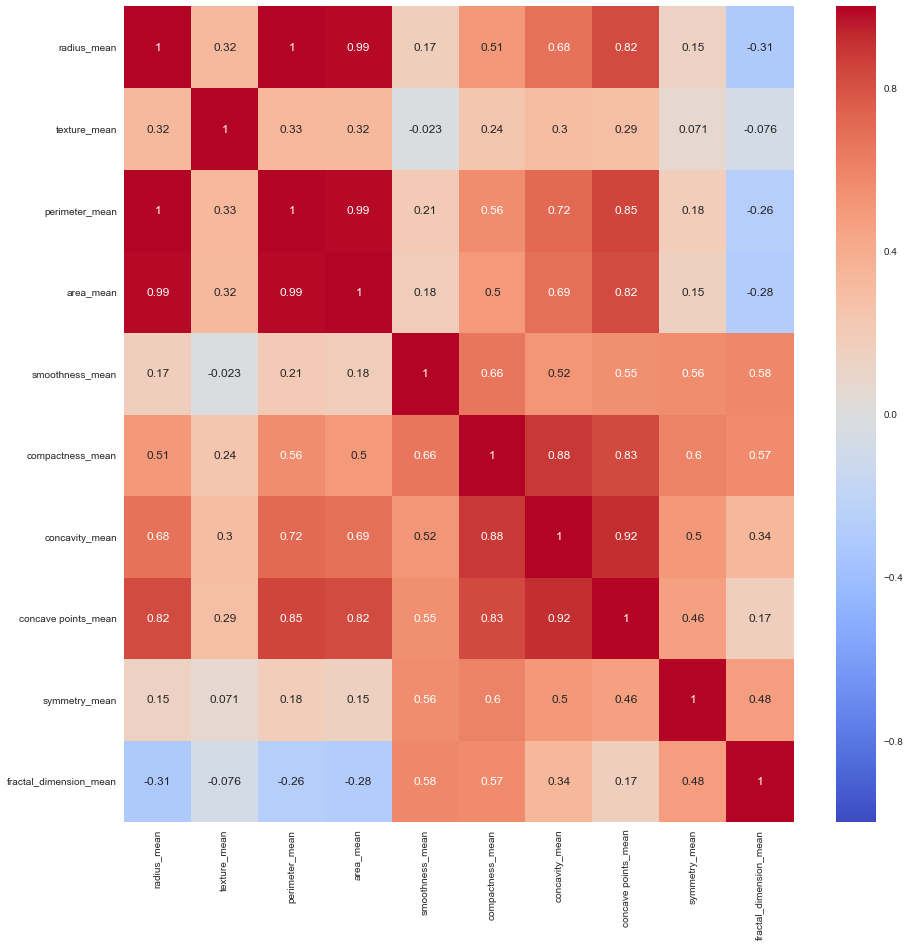

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df[means].corr(), annot = True, cmap = 'coolwarm')
plt.show()

High correlation between radius, area and perimeter are obvious, as radius increases so will the area and perimeter

In [12]:
color_dict = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dict.get(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


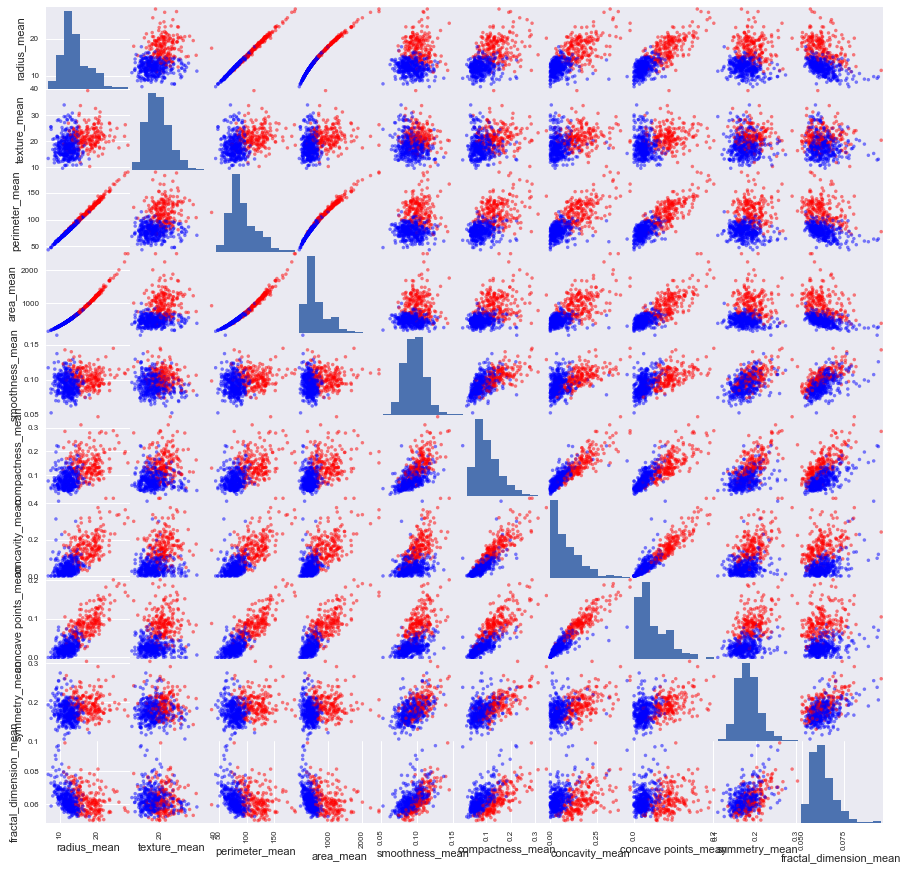

In [13]:
scattermatrix = pd.scatter_matrix(df[means], c=colors, figsize=(15,15))

# for ax in scattermatrix.ravel():
#     ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    
    
plt.show()

Interesting to see the red malignant dots are not always on the top right side of the scatters

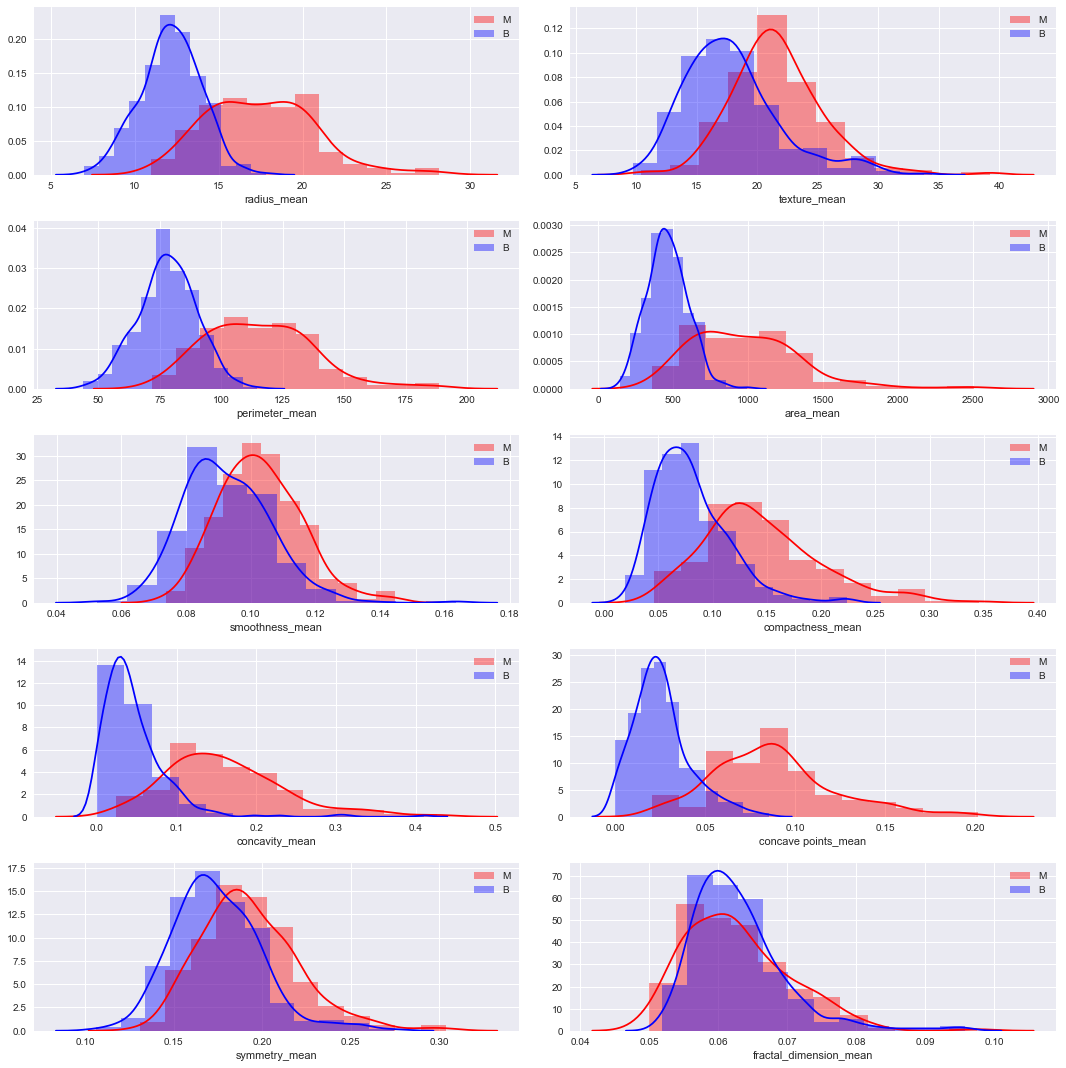

In [14]:
plt.figure(figsize= (15,15))
binn = 12
for i, feature in enumerate(means):
    plt.subplot((len(means)/2), 2, i+1)
    sns.distplot(df[df['diagnosis']=='M'][feature], bins= binn, color= 'red', label='M')
    sns.distplot(df[df['diagnosis']=='B'][feature], bins= binn, color= 'blue', label='B')
    plt.legend(loc= 'upper right')
    
plt.tight_layout()
plt.show()

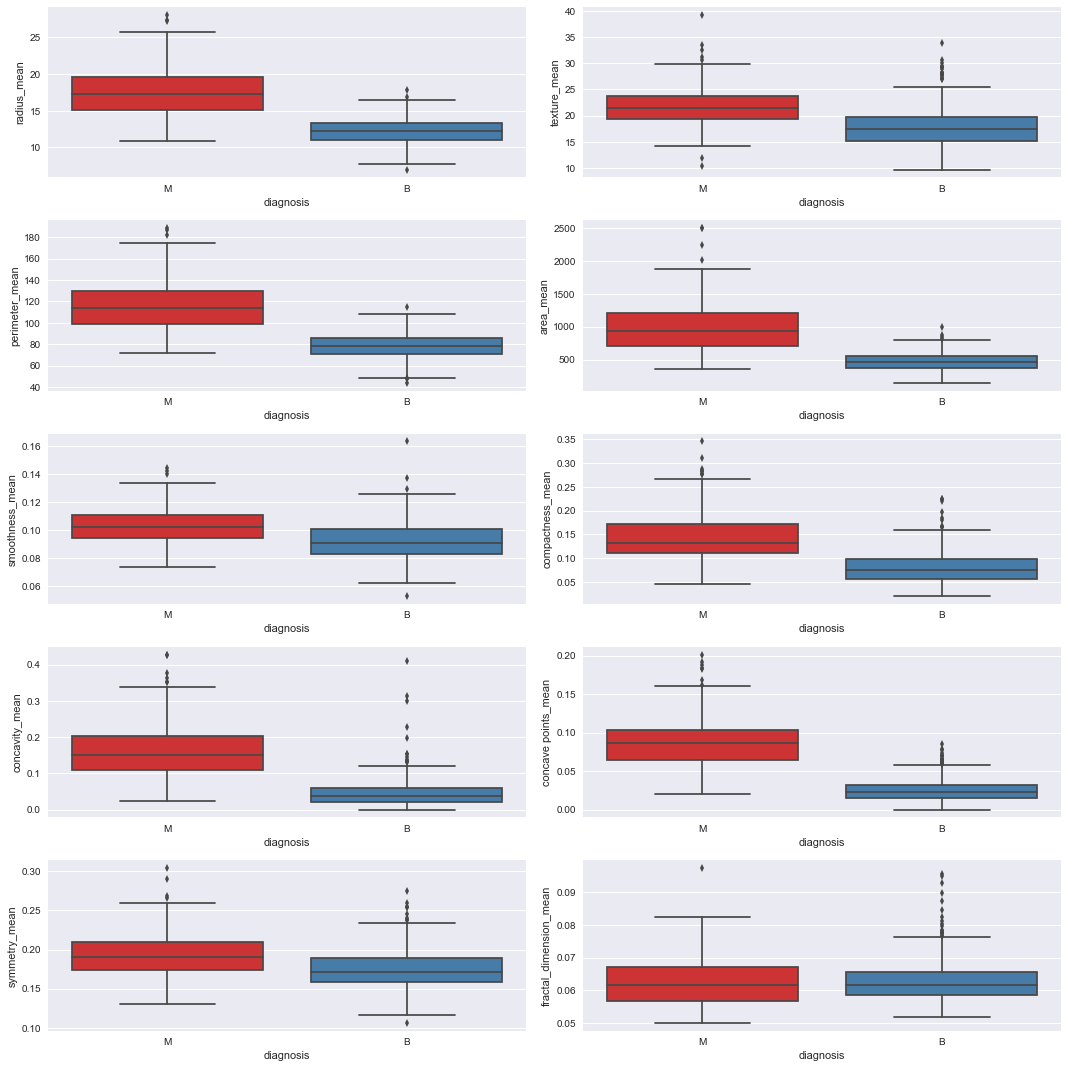

In [15]:
plt.figure(figsize= (15,15))

for i, feature in enumerate(means):
    plt.subplot((len(means)/2), 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")

    
plt.tight_layout()
plt.show()

# Predictions

In [17]:
#encode labels to numeric values for ML model 
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [18]:
#train test split 
X = df.drop(['diagnosis'], axis= 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

Support Vector Classifiers

In [25]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
# clf = SVC()
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# score = cross_val_score(clf, X, y, cv=5)
# print("SVC score = ", score)

clf_2 = LinearSVC(loss= 'hinge')
clf_2.fit(X_train, y_train)
pred = clf_2.predict(X_test)
score = cross_val_score(clf_2, X, y, cv=10)
pred = cross_val_predict(clf_2, X, y, cv=10)
accuracy = metrics.accuracy_score(y, pred)
print("LinearSVC score = ", score)
print("Accuracy= ", accuracy)

LinearSVC score =  [ 0.9137931   0.9137931   0.9122807   0.94736842  0.94736842  0.92982456
  0.94736842  0.85714286  0.92857143  0.94642857]
Accuracy=  0.896309314587


In [23]:
cm = confusion_matrix(y, pred)
print(cm)

[[306  51]
 [ 39 173]]


High number of false negatives

K Nearest Neighbours 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
score = cross_val_score(clf, X, y, cv=10)
pred = cross_val_predict(clf, X, y, cv=10)
accuracy = metrics.accuracy_score(y, pred)
print("KNN score = ", score)
print("Accuracy= ", accuracy)

KNN score =  [ 0.93103448  0.86206897  0.9122807   0.96491228  0.92982456  0.92982456
  0.96491228  0.92857143  0.91071429  0.94642857]
Accuracy=  0.927943760984


In [28]:
cm = confusion_matrix(y, pred)
print(cm)

[[342  15]
 [ 26 186]]


Number of false negatives seems lower overall, but lets try to check if other methods works any better

Using Neural Networks

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [33]:
df.shape

(569, 31)

Building the network

In [35]:
clf = Sequential() #initializing
clf.add(Dense(units = 50, kernel_initializer= 'uniform', activation= 'relu', input_dim = 30))
clf.add(Dense(units = 25, kernel_initializer= 'uniform', activation= 'relu'))
clf.add(Dense(units = 10, kernel_initializer= 'uniform', activation= 'relu'))
clf.add(Dense(units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

clf.compile(optimizer ='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

clf.fit(X_train, y_train, batch_size = 5, epochs = 75)


Epoch 1/75
426/426 [==============================] - 1s 2ms/step - loss: 0.6809 - acc: 0.6596
Epoch 2/75
426/426 [==============================] - 0s 446us/step - loss: 0.6118 - acc: 0.7277
Epoch 3/75
426/426 [==============================] - 0s 389us/step - loss: 0.4695 - acc: 0.8685
Epoch 4/75
426/426 [==============================] - 0s 418us/step - loss: 0.3432 - acc: 0.9131
Epoch 5/75
426/426 [==============================] - 0s 361us/step - loss: 0.2940 - acc: 0.8920
Epoch 6/75
426/426 [==============================] - ETA: 0s - loss: 0.2664 - acc: 0.894 - 0s 429us/step - loss: 0.2676 - acc: 0.8920
Epoch 7/75
426/426 [==============================] - 0s 436us/step - loss: 0.2712 - acc: 0.9014
Epoch 8/75
426/426 [==============================] - 0s 579us/step - loss: 0.2420 - acc: 0.9131
Epoch 9/75
426/426 [==============================] - 0s 399us/step - loss: 0.2598 - acc: 0.8991
Epoch 10/75
426/426 [==============================] - 0s 404us/step - loss: 0.2486 - acc: 

In [36]:
y_pred = clf.predict(X_test)
y_pred = [ 1 if y>=.4 else 0 for y in y_pred ]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78 10]
 [ 4 51]]


False negatives are quite high

In [37]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

Accuracy: 90.2097902098%


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

In [40]:
print("Naive Bayes score = ", scores)
accuracy = metrics.accuracy_score(y_test, prediction)
print("Accuracy= ", accuracy)

Naive Bayes score =  [ 0.9309831   0.9791773   0.98627875  0.98794196  0.9910676 ]
Accuracy=  0.93006993007


In [41]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[81  7]
 [ 3 52]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,30,50,100], 'criterion':['gini', 'entropy']}
clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)


In [44]:
accuracy = metrics.accuracy_score(y_test, prediction)
print("Random forest score = ", scores)

print("Accuracy= ", accuracy)

Random forest score =  [ 0.9833323   0.97165672  0.99507128  0.98477761  0.99616443]
Accuracy=  0.944055944056


In [45]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [46]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[85  3]
 [ 5 50]]


Best result so far, lowest number of false negatives